In [ ]:
!unzip "/content/drive/MyDrive/trainSet.zip"

Streaming output truncated to the last 5000 lines.
 extracting: trainSet/f84aa25d-DM_Shining_Star_Regular-12px-italic-bold.png  
  inflating: trainSet/f84aab06-TH_Chakra_Petch-20px-normal-bold.png  
 extracting: trainSet/f84b6f46-Angsana_New-12px-normal-bold.png  
  inflating: trainSet/f84bf11a-TH_Mali_Grade6-14px-italic-bold.png  
  inflating: trainSet/f84bf30c-FC_Knomphing_Regular-24px-italic-normal.png  
  inflating: trainSet/f84cf1b6-TH_Charm_of_AU-20px-italic-bold.png  
 extracting: trainSet/f84d0367-fonttintin-12px-normal-normal.png  
 extracting: trainSet/f84d2d8a-TH_Sarabun-22px-italic-bold.png  
 extracting: trainSet/f84e0cd3-TH_Charm_of_AU-20px-normal-bold.png  
  inflating: trainSet/f84e0e65-Cordia_New-14px-normal-normal.png  
 extracting: trainSet/f84e5406-DM_Shining_Star_Regular-12px-italic-bold.png  
 extracting: trainSet/f84e9d4-FC_Knomphing_Regular-16px-normal-bold.png  
 extracting: trainSet/f84f2e07-TH_Charm_of_AU-16px-italic-bold.png  
  inflating: trainSet/f84f5303-

In [ ]:
import os
from pathlib import Path
from os import listdir
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose

In [ ]:
# Path to the data directory
data_dir1 = Path("/content/trainSet")
# Get list of all the images
images = listdir(data_dir1)
id=[]
text=[]
font=[]
size=[]
italic=[]
bold=[]

for img in images:
  id.append(img.split(".png")[0].split('-')[0])
  font.append(img.split(".png")[0].split('-')[1])
  size.append(img.split(".png")[0].split('-')[2])
  italic.append(img.split(".png")[0].split('-')[3])
  bold.append(img.split(".png")[0].split('-')[4])

print("Number of images found: ", len(id))

Number of images found:  156010


In [ ]:
import pandas as pd

In [ ]:
data ={'Id':id, 'Font':font,'italic':italic,'bold':bold}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Id,Font,italic,bold
0,cb138b41,DM_Shining_Star_Regular,italic,normal
1,1fa6bf5c,TH_Mali_Grade6,normal,normal
2,30c2ea04,TH_Mali_Grade6,normal,bold
3,c1445977,FC_Knomphing_Regular,italic,normal
4,a24d491d,TH_Mali_Grade6,italic,bold
...,...,...,...,...
156005,d0ea7965,FC_Knomphing_Regular,normal,bold
156006,40a1036d,TH_Sarabun,italic,normal
156007,e88ad576,FC_Knomphing_Regular,italic,bold
156008,5a3b293f,Kunlasatri,italic,bold


In [ ]:
import tensorflow as tf
import keras
from keras import utils

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def conv_label(label):
    if label == 'Angsana_New':
        return 0
    elif label == 'Cordia_New':
        return 1
    elif label == 'DM_Shining_Star_Regular':
        return 2
    elif label == 'FC_Knomphing_Regular':
        return 3
    elif label == 'fonttintin':
        return 4
    elif label == 'Kunlasatri':
        return 5
    elif label == 'TH_Chakra_Petch':
        return 6
    elif label == 'TH_Charm_of_AU':
        return 7
    elif label == 'TH_Mali_Grade6':
        return 8
    elif label == 'TH_Sarabun':
        return 9

In [ ]:
data=[]
labels=[]
for img in images:
  img2 = cv2.imread("/content/trainSet/"+img)
  #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  #threshold, binarizedImage = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  #binarizedImage = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
  dim=(105,105)
  resized = cv2.resize(img2, dim)
  data.append(resized)
  label = img.split(".png")[0].split('-')[1]
  labels.append(conv_label(label))

In [ ]:
data1=np.array(data)
labels = np.array(labels)

(array([15872., 15419., 15490., 15583., 15936., 15233., 15504., 15409.,
        15604., 15960.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

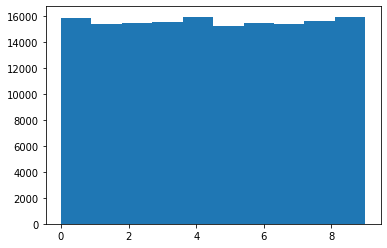

In [ ]:
plt.hist(labels,bins=10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, labels, test_size=0.20, random_state=42,stratify=labels)

In [ ]:
X_train = X_train.astype('float32')
X_train/=255
X_train = X_train.reshape(124808, 105, 105,1)

X_test = X_test.astype('float32')
X_test/=255
X_test = X_test.reshape(31202, 105, 105,1)

In [ ]:
Y_train= tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128,seed=42,shuffle=True)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128,seed=42,shuffle=True)

In [ ]:
from keras.models import Sequential

In [ ]:
def create_model():
  model=Sequential()

  # Cu Layers 
  model.add(Conv2D(64, kernel_size=(48, 48), activation='relu', input_shape=(105,105,1)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(24, 24), activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2DTranspose(128, (24,24), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
  model.add(UpSampling2D(size=(2, 2)))

  model.add(Conv2DTranspose(64, (12,12), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
  model.add(UpSampling2D(size=(2, 2)))

  #Cs Layers
  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Flatten())

  model.add(Dense(4096, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(4096,activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(2383,activation='relu'))

  model.add(Dense(10, activation='softmax'))
 
  return model

In [ ]:
model = create_model() 
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 64)        147520    
                                                                 
 batch_normalization (BatchN  (None, 58, 58, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 128)         4718720   
                                                                 
 batch_normalization_1 (Batc  (None, 6, 6, 128)        512       
 hNormalization)                                                 
                                                        

In [21]:
model.fit(train_generator, steps_per_epoch=124808//128, epochs=50, verbose=1, validation_data=test_generator, validation_steps=31202//128)

Epoch 1/50
975/975 [==============================] - 275s 272ms/step - loss: 0.1799 - categorical_accuracy: 0.0998 - val_loss: 0.1801 - val_categorical_accuracy: 0.0996
Epoch 2/50
975/975 [==============================] - 264s 271ms/step - loss: 0.1800 - categorical_accuracy: 0.0999 - val_loss: 0.1801 - val_categorical_accuracy: 0.0997
Epoch 3/50
975/975 [==============================] - 264s 271ms/step - loss: 0.1800 - categorical_accuracy: 0.0999 - val_loss: 0.1800 - val_categorical_accuracy: 0.0998
Epoch 4/50
975/975 [==============================] - 264s 271ms/step - loss: 0.1800 - categorical_accuracy: 0.0999 - val_loss: 0.1800 - val_categorical_accuracy: 0.1001
Epoch 5/50
975/975 [==============================] - 264s 271ms/step - loss: 0.1800 - categorical_accuracy: 0.0999 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 6/50
975/975 [==============================] - 264s 270ms/step - loss: 0.1800 - categorical_accuracy: 0.0999 - val_loss: 0.1800 - val_categoric

KeyboardInterrupt: ignored

In [ ]:
model.fit(X_train,Y_train, epochs=50)